# Cost Function Visualizations

### Load and prepare the data

In [0]:
import numpy as np
import pandas as pd

Lets load the dataset unto our workspace with Pandas:

In [112]:
df = pd.read_csv('/content/sample_data/weatherww2.csv')
df = df[['MinTemp', 'MaxTemp']]
df.head(10)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.



,MinTemp,MaxTemp
0,22.222222,25.555556
1,21.666667,28.888889
2,22.222222,26.111111
3,22.222222,26.666667
4,21.666667,26.666667
5,21.666667,26.666667
6,22.777778,28.333333
7,22.222222,26.666667
8,22.777778,27.222222
9,21.666667,25.555556


This is a pretty straightforward and simple linear regression task

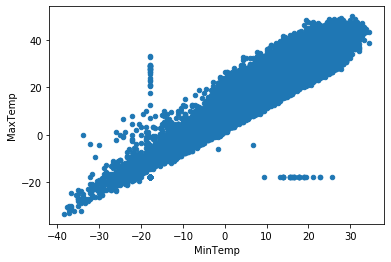

In [113]:
df.plot.scatter('MinTemp', 'MaxTemp')

### Setting up the visualizations
Let's visualize for this data how the cost function will look like for the MSE loss for different parameters and models
<img src="https://i.ibb.co/LYB4Yx0/mse.png" alt="mse" width="600"/>

In [0]:
# define the vectorized MSE cost function 
def mse_cost(predictions, target):
    N = predictions.shape[0]
    diff = predictions.ravel() - target.ravel()
    cost = np.dot(diff, diff.T) / N
    return cost

In [0]:
# define the prediction for a simple linear model
def LinearModel(thetas, X):
    # normalize add bias term
    X = (X - X.mean()) / X.std()
    X = np.hstack((X, np.ones((X.shape[0], 1), dtype=X.dtype)))
    return np.dot(X, thetas)

In [0]:
# initialize data structures
vis_df = df.sample(frac=0.1)
y = vis_df.iloc[:, 1].to_numpy().reshape(-1, 1)
X = vis_df.iloc[:, 0].to_numpy().reshape(-1, 1)

In [0]:
# grid search over "all" possible theta values and compute cost
start, end, step = -200, 200, 5
thetas_0, thetas_1 = np.arange(start, end, step), np.arange(start, end, step)

# loop over the all the parameter pairs and create a list of all possible pairs
thetas_lst = []
for theta_0 in thetas_0:
    for theta_1 in thetas_1:
        thetas_lst.append(np.array([theta_0, theta_1]).reshape(-1, 1))

linear_cost_lst = []       
for thetas in thetas_lst:
    # get prediction from our model
    pred_linear = LinearModel(thetas, X)
    # keep track of the cast per parameter pairs
    linear_cost_lst.append(mse_cost(pred_linear, y))

### Linear Model Cost Function Visualization

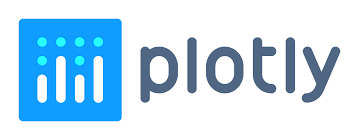
<br>
An open-source, interactive graphing library for Python

In [0]:
# arrange the costs back to a square matrix grid
axis_length = len(np.arange(start, end, step))
linear_cost_matrix = np.array(linear_cost_lst).reshape(axis_length, axis_length)

In [133]:
import plotly.graph_objects as go

# plot the surface plot with plotly's Surface
fig = go.Figure(data=go.Surface(z=linear_cost_matrix,
                                x=thetas_0,
                                y=thetas_1))

# add a countour plot
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))

# annotate the plot
fig.update_layout(title='Linear Model MSE Cost Surface',
                  scene=dict(
                    xaxis_title='theta_0 (intercept)',
                    yaxis_title='theta_1 (slope)',
                    zaxis_title='MSE Cost'),
                  width=700, height=700)

fig.show()

### Neural Net Model Cost Function Visualization

In [0]:
# define the predictions function for the mini-network
def MiniNet(thetas, X):
    z1 = X * thetas[0]
    a1 = np.tanh(z1)
    z2 = a1 * thetas[1]
    return z2

Behold! The all Powerful MiniNet ~
![MiniNet](https://i.ibb.co/0tC7gLQ/MiniNet.png)

In [0]:
# repeat the process for the NN

nn_cost_lst = []       
for thetas in thetas_lst:
    # get prediction from our model
    pred_nn = MiniNet(thetas, X)
    # keep track of the cast per parameter pairs
    nn_cost_lst.append(mse_cost(pred_nn, y))

In [0]:
# arrange the costs back to a square matrix grid
nn_cost_matrix = np.array(nn_cost_lst).reshape(axis_length, axis_length)

In [148]:
# plot the surface plot with plotly's Surface
fig = go.Figure(data=go.Surface(z=nn_cost_matrix,
                                x=thetas_0,
                                y=thetas_1))

# add a countour plot
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))

# annotate the plot
fig.update_layout(title='MiniNet Model MSE Cost Surface',
                  width=700, height=700)

fig.show()